In [1]:
# Step 1: Import libraries
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\salon\OneDrive\Desktop\mail_data.csv")

# Step 3: Preprocessing function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces
    text = text.strip()
    return text

df['cleaned_message'] = df['Message'].apply(clean_text)

# Step 4: Split dataset
X = df['cleaned_message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert text to numerical (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test_vec)

# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9757847533632287

Confusion Matrix:
 [[966   0]
 [ 27 122]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [2]:
import pandas as pd
import string, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


df = pd.read_csv(r"C:\Users\salon\OneDrive\Desktop\mail_data.csv")

print("Dataset shape:", df.shape)
print(df.head())


def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

df['cleaned'] = df['Message'].apply(clean_text)


vocab_size = 5000  
onehot_repr = [one_hot(doc, vocab_size) for doc in df['cleaned']]
padded_docs = pad_sequences(onehot_repr, maxlen=20, padding='post')

print("\n Example One-Hot Encoded (first 3):")
print(onehot_repr[:3])
print("\n Padded Sequences (first 3):")
print(padded_docs[:3])


cv = CountVectorizer(max_features=20)   # limit for demo
X_bow = cv.fit_transform(df['cleaned']).toarray()

print("\n Bag of Words Vocabulary (top 20):")
print(cv.get_feature_names_out())
print("\n Example BOW Vectors (first 3):")
print(X_bow[:3])


cv_bigram = CountVectorizer(ngram_range=(2,2), max_features=20)
X_bigram = cv_bigram.fit_transform(df['cleaned']).toarray()

print("\n Bi-gram Vocabulary (top 20):")
print(cv_bigram.get_feature_names_out())
print("\n Example Bi-gram Vectors (first 3):")
print(X_bigram[:3])

tfidf = TfidfVectorizer(max_features=20)
X_tfidf = tfidf.fit_transform(df['cleaned']).toarray()

print("\n TF-IDF Vocabulary (top 20):")
print(tfidf.get_feature_names_out())
print("\n Example TF-IDF Vectors (first 3):")
print(X_tfidf[:3])

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['Category'], test_size=0.2, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Dataset shape: (5572, 2)
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

 Example One-Hot Encoded (first 3):
[[650, 1044, 2836, 4845, 3466, 248, 238, 4063, 946, 2838, 859, 3132, 258, 3098, 4353, 2528, 4779, 4177, 4850, 1528], [3429, 1767, 4358, 4672, 1247, 8], [1178, 3379, 4063, 64, 2527, 2183, 4839, 327, 609, 4819, 4524, 4292, 2938, 1715, 2604, 609, 4839, 4839, 1158, 3379, 3540, 4897, 32, 382, 3085]]

 Padded Sequences (first 3):
[[ 650 1044 2836 4845 3466  248  238 4063  946 2838  859 3132  258 3098
  4353 2528 4779 4177 4850 1528]
 [3429 1767 4358 4672 1247    8    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [2183 4839  327  609 4819 452

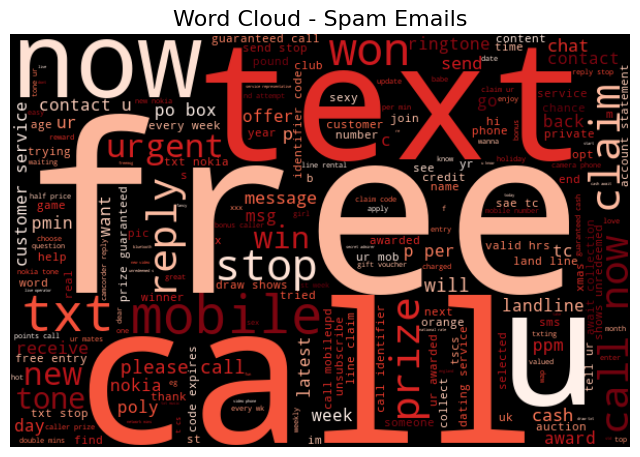

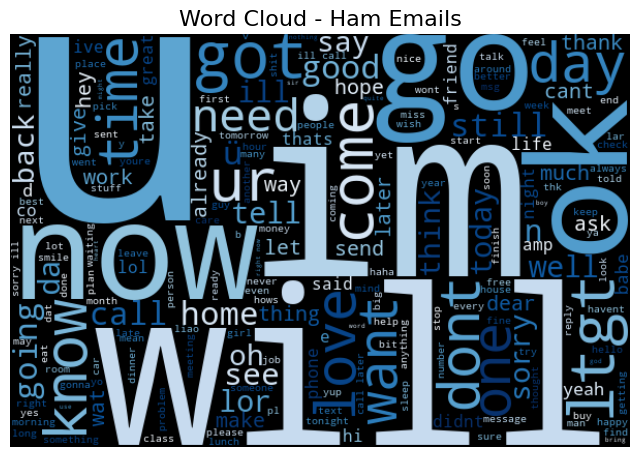

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for Spam emails
spam_words = ' '.join(df[df['Category']=='spam']['cleaned'])
spam_wc = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_words)

plt.figure(figsize=(8,6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Spam Emails", fontsize=16)
plt.show()

# Word cloud for Ham emails
ham_words = ' '.join(df[df['Category']=='ham']['cleaned'])
ham_wc = WordCloud(width=600, height=400, background_color='black', colormap='Blues').generate(ham_words)

plt.figure(figsize=(8,6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Ham Emails", fontsize=16)
plt.show()


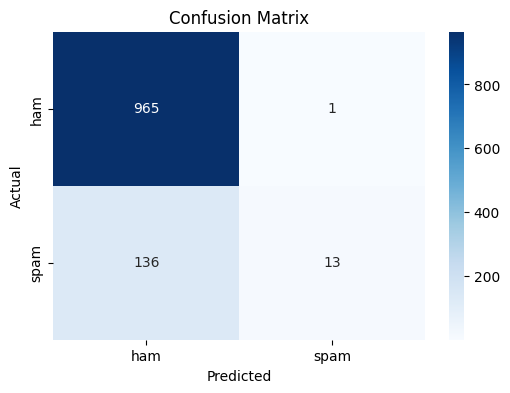

In [4]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Function to predict a single email
def predict_email(text):
    # Clean the text (same as training preprocessing)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    
    # Convert to TF-IDF vector
    vector = tfidf.transform([text]).toarray()
    
    # Predict
    prediction = model.predict(vector)[0]
    return prediction


# Take user input
while True:
    user_email = input("\nEnter an email to check (or type 'exit' to quit): ")
    if user_email.lower() == 'exit':
        print("Exiting... Goodbye ")
        break
    result = predict_email(user_email)
    print(f"The email is classified as: {result}")



Enter an email to check (or type 'exit' to quit):  exit


Exiting... Goodbye 



Model Comparison:
Naive Bayes: Accuracy = 0.8771
Logistic Regression: Accuracy = 0.9103
Random Forest: Accuracy = 0.9435


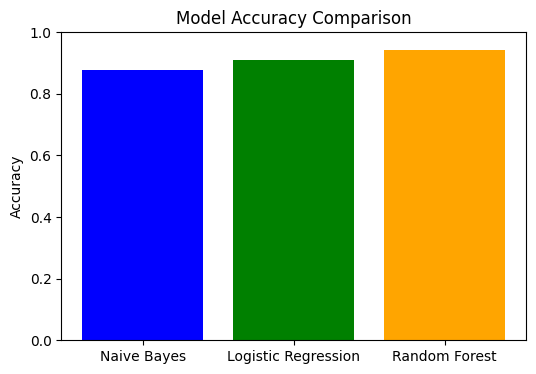

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model_i in models.items():
    model_i.fit(X_train, y_train)
    y_pred_i = model_i.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred_i)
    results[name] = {
        "accuracy": acc,
        "classification_report": classification_report(y_test, y_pred_i, output_dict=True)
    }
    
# Display results
print("\nModel Comparison:")
for name, res in results.items():
    print(f"{name}: Accuracy = {res['accuracy']:.4f}")

# Optional: Bar chart of accuracies
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]

plt.figure(figsize=(6,4))
plt.bar(model_names, accuracies, color=['blue','green','orange'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


In [7]:
df = pd.read_csv(r"C:\Users\salon\OneDrive\Desktop\mail_data.csv")
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
